In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
path = "./input/"

df = pd.read_csv(path + "train.csv")
df_test = pd.read_csv(path + "test.csv")

data = pd.concat([df, df_test], sort=False)

print(df.shape)
print(df_test.shape)

(7134, 29)
(1794, 28)


In [6]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2860d3f9ee4d4b,46f1b1c3bf0dae,25ade93a241f39,0,0,0.0,0,0,0,80,...,0,0.0,0,0.0,0,0,257.0,4,0,0.167487
1,0b88c47e54cdcc,5e92598b08bcb1,95125f5e05c653,0,2,359.0,4,0,0,5,...,1,262.7,0,0.0,0,0,1025.0,5,1607,0.610492
2,8f086d61515bc4,ed4cfbc560f490,8a84da96d077c3,0,0,223.5,1,0,0,15,...,0,0.0,0,0.0,0,0,712.8,2,1736,0.666206
3,7c037ca62a38a4,d2ff4830704e19,a139eac809980a,0,0,128.1,0,0,0,50,...,0,0.0,0,0.0,0,0,2738.0,4,1476,0.722956
4,82f08cde238c60,7c5002766d8c7a,e9d203a36b1d0a,0,0,200.0,2,0,0,36,...,0,0.0,0,0.0,0,0,129.4,2,0,0.204095


In [7]:
df.isnull().sum().sum()

0

In [8]:
df_test.isnull().sum().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7134 entries, 0 to 7133
Data columns (total 29 columns):
Id                 7134 non-null object
groupId            7134 non-null object
matchId            7134 non-null object
assists            7134 non-null int64
boosts             7134 non-null int64
damageDealt        7134 non-null float64
DBNOs              7134 non-null int64
headshotKills      7134 non-null int64
heals              7134 non-null int64
killPlace          7134 non-null int64
killPoints         7134 non-null int64
kills              7134 non-null int64
killStreaks        7134 non-null int64
longestKill        7134 non-null float64
matchDuration      7134 non-null int64
matchType          7134 non-null object
maxPlace           7134 non-null int64
numGroups          7134 non-null int64
rankPoints         7134 non-null int64
revives            7134 non-null int64
rideDistance       7134 non-null float64
roadKills          7134 non-null int64
swimDistance       7134 n

In [10]:
str_list =["Id", "groupId", "matchId", "matchType"]

In [11]:
print(len(set(df["matchId"])))
print(len(set(df_test["matchId"])))

print(len(set(df["groupId"])))
print(len(set(df_test["groupId"])))


76
19
3239
882


In [12]:
df.groupby("matchId")["winPlacePerc"]

In [13]:
set(df["matchType"])

{'crashfpp', 'duo', 'duo-fpp', 'solo', 'solo-fpp', 'squad', 'squad-fpp'}

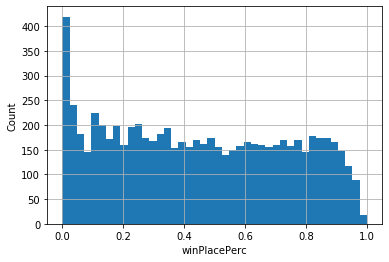

In [14]:
df["winPlacePerc"].hist(bins=int(0.5*np.sqrt(len(df["winPlacePerc"]))))
plt.xlabel("winPlacePerc")
plt.ylabel("Count")
plt.show()

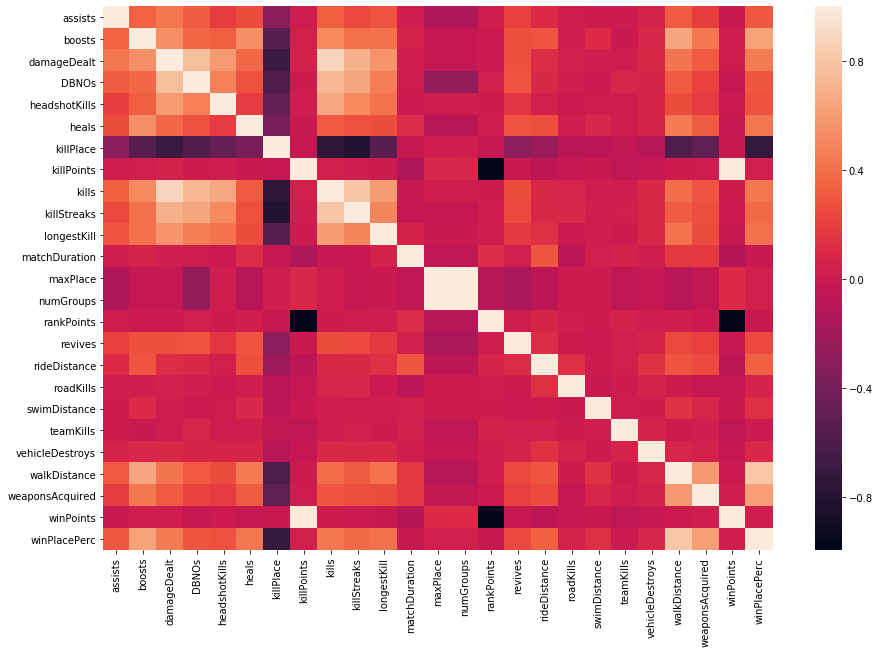

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())
plt.show()

In [16]:
columns_list = df.columns.tolist()

print(columns_list)

['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc']


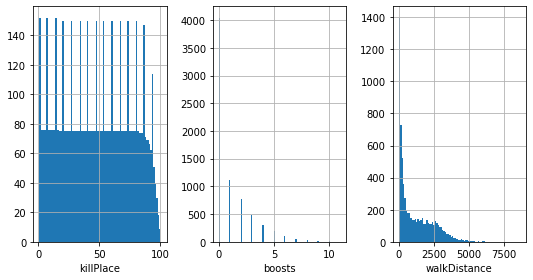

In [17]:
plt.figure(figsize=(10,4))

high_corr_to_target_list = ["killPlace", "boosts", "walkDistance", "weaponsAcquired"]


for i in range(1, len(high_corr_to_target_list)):
    # print(i)
    plt.subplot(1,len(high_corr_to_target_list),i)
    
    df[high_corr_to_target_list[i-1]].hist(bins=int(np.sqrt(df.shape[0])))
    plt.xlabel(high_corr_to_target_list[i-1])
    plt.tight_layout()

Text(0.5, 0, 'weaponsAcquired')

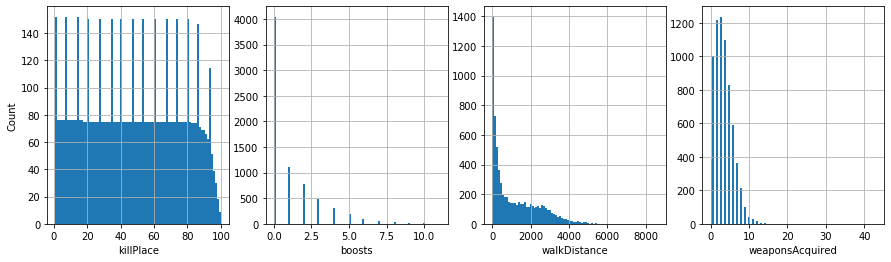

In [18]:
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
df["killPlace"].hist(bins=int(np.sqrt(df.shape[0])))
plt.xlabel("killPlace")
plt.ylabel("Count")

plt.subplot(1,4,2)
df["boosts"].hist(bins=int(np.sqrt(df.shape[0])))
plt.xlabel("boosts")
# plt.ylabel("Count")

plt.subplot(1,4,3)
df["walkDistance"].hist(bins=int(np.sqrt(df.shape[0])))
plt.xlabel("walkDistance")
# plt.ylabel("Count")

plt.subplot(1,4,4)
df["weaponsAcquired"].hist(bins=int(np.sqrt(df.shape[0])))
plt.xlabel("weaponsAcquired")
# plt.ylabel("Count")

In [19]:
# Create base line model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

X, y = df.drop(str_list, axis=1).iloc[:, :-1], df.iloc[:, -1]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

preds = rfr.predict(X_valid)

score = MAE(y_valid, preds)

print("Baseline model score:", score)

Baseline model score: 0.0661356327185229


In [23]:
# XGBoost baseline
import xgboost as xgb

xgr = xgb.XGBRegressor()
xgr.fit(X_train, y_train)
preds_xgr = xgr.predict(X_valid)

score_xgb = MAE(y_valid, preds_xgr)
print("Score with xgboost regressor:", score_xgb)

[00:32:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Score with xgboost regressor: 0.0679120909551406


In [26]:
X_test = df_test.drop(str_list, axis=1)
predict = xgr.predict(X_test)

submission = pd.read_csv("submission.csv")
submission.head()

,winPlacePerc
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [29]:
submission["winPlacePerc"] = predict
submission.head()

submission.to_csv("submission.csv")

[00:22:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


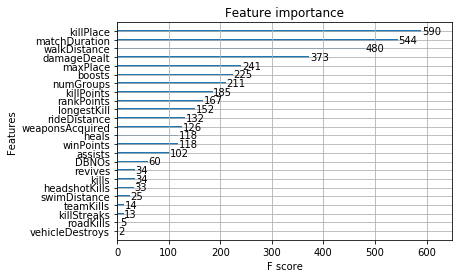

In [22]:
dmatrix = xgb.DMatrix(data=X_train, label=y_train)
params = {"objective":"reg:linear", "max_depth":10}

xg_reg = xgb.train(dtrain=dmatrix, params=params, num_boost_round=10)

xgb.plot_importance(xg_reg)
plt.show()

In [ ]:
train_DMatrix = xgb.DMatrix(data=X_train, label=y_train)
valid_DMatrix = xgb.DMatrix(data=X_valid, label=y_valid)

params = {"objective":"reg:linear", "max_depth":4}

xgr_cv = xgb.XGBRegressor()

cv_results = xgb.cv(dtrain=train_DMatrix, params=params, nfold=5, num_boost_round=10, metrics="mae", as_pandas=True, seed=42)

# preds = xgb.predict(X_valid)

print(cv_results)
print("*****************************")
print((cv_results["test-mae-mean"]))